# Camera calibration

In this notebook we will perform camera calibration in order to compute the camera matrix

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import glob
import pickle
%matplotlib inline

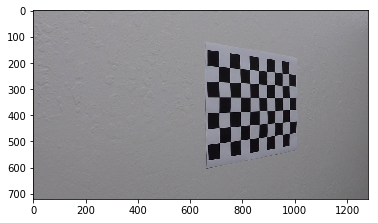

In [2]:
# Find images
images = glob.glob("./camera_cal/calibration*.jpg")
plt.imshow(mpimg.imread(images[0]))

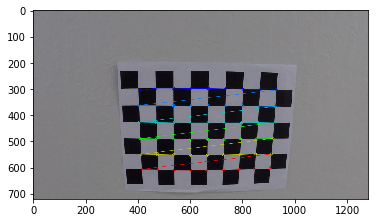

In [3]:
# Prepare arrays to store points
objpoints = []
imgpoints = []
shapes = []

# Prepare chessboard object points
objp = np.zeros((6*9,3), dtype=np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1, 2)

for fname in images:
    # Read each image
    img = mpimg.imread(fname)
    
    # Convert image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    # Find chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6), None)
    
    if ret:
        imgpoints.append(corners)
        objpoints.append(objp)
        shapes.append(img.shape)
        plt.imshow(cv2.drawChessboardCorners(img, (9,6), corners, ret))

In [4]:
# Print in how many images we found corners
print("Number of images with corners: {} / {}".format(len(imgpoints), len(images)))

Number of images with corners: 17 / 20


In [5]:
# Check they all have the same shape
shapes

[(720, 1280, 3),
 (720, 1280, 3),
 (720, 1280, 3),
 (720, 1280, 3),
 (720, 1280, 3),
 (720, 1280, 3),
 (720, 1280, 3),
 (720, 1280, 3),
 (720, 1280, 3),
 (721, 1281, 3),
 (720, 1280, 3),
 (720, 1280, 3),
 (720, 1280, 3),
 (721, 1281, 3),
 (720, 1280, 3),
 (720, 1280, 3),
 (720, 1280, 3)]

Three image have 1281x721 size, but we deem the difference as negliglible

In [6]:
# Calibrate camera
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

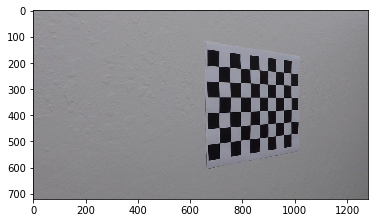

In [7]:
# Try to undistort
dst = cv2.undistort(mpimg.imread(images[0]), mtx, dist, None, mtx)
plt.imshow(dst)

In [8]:
# Pickle calibration data and save it
calibration_data = {"mtx": mtx, "dist": dist}
with open('./camera_cal/calibration_data.p', 'wb') as cal_f:
    pickle.dump(calibration_data, cal_f)